# EDA

In [1]:
# Imports and installs

import twint
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', palette='bright', color_codes=True)
sns.set_context('talk')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV

# !pip install imblearn
from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss

# !pip install xgboost
import xgboost as xgb

Using TensorFlow backend.
/Users/flatironschool/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/flatironschool/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/flatironschool/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/flatironschool/.local/lib/pytho

## Setting up twint

In [2]:
c = twint.Config()

In [3]:
# Solved compatibility issues with notebooks and RunTime errors

# !pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

## Movies:

In [4]:
# The date is 2 days before the movie launches

movies = {'First Love': '2019-09-25', 'Fantastic Fungi': '2019-10-09', 'Luce': '2019-07-31', 'Tazza: One Eyed Jack': '2019-09-18', 'The Zoya Factor': '2019-09-18', 'Anthropocene: The Human Epoch': '2019-09-23', 'The Fighting Preacher': '2019-07-22', 'The Day Shall Come': '2019-09-25', 'The Kitchen (2019)': '2019-08-06', "Where'd You Go, Bernadette": '2019-08-14', 'Fiddler: A Miracle of Miracles': '2019-08-21', 'Maiden': '2019-06-26', 'Ms. Purple': '2019-09-04', 'Tigers are Not Afraid': '2019-08-19', 'David Crosby: Remember My Name': '2019-07-17', 'Loro': '2019-09-18', 'Men in Black International': '2019-06-12', 'Give Me Liberty': '2019-08-21', 'After the Wedding (2019)': '2019-01-22', 'Before You Know It (2019)': '2019-08-28', 'Tel Aviv on Fire': '2019-07-31', 'The Sound of Silence': '2019-09-11', 'Britt-Marie Was Here': '2019-09-18', 'Moonlight Sonata: Deafness in Three Movements': '2019-09-11', 'One Cut of the Dead': '2019-09-11', 'Edie': '2019-09-04', 'Chasing Einstein': '2019-09-11', 'Aga': '2019-09-02', 'Midnight Traveler': '2019-09-16', 'Rojo': '2018-09-08', 'A Faithful Man': '2018-09-07', 'Under the Sea 3D': '2009-02-11', 'Série Noire (2019)': '2019-09-25', 'Cold Case Hammarskjöld': '2019-08-14', 'Echo in the Canyon': '2019-05-22', 'The Other Side of Heaven 2: Fire of Faith': '2019-06-26', 'Desolation Center': '2019-09-11', 'Jay Myself': '2019-07-29', 'The Death and Life of John F. Donovan': '2019-08-21', 'Be Natural: The Untold Story of Alice Guy-Blaché': '2019-04-17', 'Chained for Life': '2019-09-09', 'Toni Morrison: The Pieces I Am': '2019-06-19', 'Mike Wallace is Here': '2019-01-25', 'Fagara': '2019-09-11', 'Imprisoned': '2019-09-11', 'The Mountain': '2019-07-24', 'Union (2019)': '2019-07-31', 'The Chambermaid (2019)': '2019-06-24'}

In [5]:
# Rotten Tomatoes binary score, 60% is the boundary

frotten = {'First Love': 1, 'Fantastic Fungi': 1, 'Luce': 1, 'Tazza: One Eyed Jack': 1, 'The Zoya Factor': 0, 'Anthropocene: The Human Epoch': 1, 'The Fighting Preacher': 1, 'The Day Shall Come': 1, 'The Kitchen (2019)': 0, "Where'd You Go, Bernadette": 0, 'Fiddler: A Miracle of Miracles': 1, 'Maiden': 1, 'Ms. Purple': 1, 'Tigers are Not Afraid': 1, 'David Crosby: Remember My Name': 1, 'Loro': 1, 'Men in Black International': 0, 'Give Me Liberty': 1, 'After the Wedding (2019)': 0, 'Before You Know It (2019)': 1, 'Tel Aviv on Fire': 1, 'The Sound of Silence': 1, 'Britt-Marie Was Here': 1, 'Moonlight Sonata: Deafness in Three Movements': 1, 'One Cut of the Dead': 1, 'Edie': 1, 'Chasing Einstein': 1, 'Aga': 1, 'Midnight Traveler': 1, 'Rojo': 1, 'A Faithful Man': 1, 'Under the Sea 3D': 1, 'Série Noire (2019)': 1, 'Cold Case Hammarskjöld': 1, 'Echo in the Canyon': 1, 'The Other Side of Heaven 2: Fire of Faith': 1, 'Desolation Center': 1, 'Jay Myself': 1, 'The Death and Life of John F. Donovan': 0, 'Be Natural: The Untold Story of Alice Guy-Blaché': 1, 'Chained for Life': 1, 'Toni Morrison: The Pieces I Am': 1, 'Mike Wallace is Here': 1, 'Fagara': 1, 'Imprisoned': 0, 'The Mountain': 1, 'Union (2019)': 1, 'The Chambermaid (2019)': 1}

In [6]:
# Function for getting the tweets for each movie before the respective date

def get_tweets(movies):
    df = pd.DataFrame()
    for key, value in movies.items():
        key = key + ' movie'
        c.Search = key
        c.Since = value
        c.Verified = False
        c.Pandas = True
        c.Limit = 2000 # Gets increments of 20

        twint.run.Search(c)
        t = twint.storage.panda.Tweets_df
        df = pd.concat([df, t])
    df.to_pickle("./df.pkl")
    return df

In [7]:
# get_tweets(movies)

In [8]:
unpickled_df = pd.read_pickle("./Pickles/df.pkl")

In [9]:
unpickled_df

,cashtags,conversation_id,created_at,date,day,geo,hashtags,hour,id,link,...,retweet_id,search,source,timezone,tweet,user_id,user_id_str,user_rt,user_rt_id,username
0,[],1179810430136569862,1570123701000,2019-10-03 13:28:21,3,,"[#분량편차금지, #유료컨텐츠불매]",20,1179810430136569862,https://twitter.com/YoonieFirstLove/status/117...,...,,First Love movie,,EDT,Bighit Plz don't ignore the demands of fans re...,951928645572087809,951928645572087809,,,YoonieFirstLove
1,[],1179808520335773696,1570123245000,2019-10-03 13:20:45,5,,[#catherinafullbody],13,1179808520335773696,https://twitter.com/danaligieri2011/status/117...,...,,First Love movie,,EDT,"#CatherinaFullBody ""I'm so excited!♡♡♡ I hope...",1557528492,1557528492,,,danaligieri2011
2,[],1179121490953945090,1570123032000,2019-10-03 13:17:12,3,,[],02,1179807626885877760,https://twitter.com/Stark4Machines/status/1179...,...,,First Love movie,,EDT,"I studied film acting in 2006, was a SAG actor...",4645519039,4645519039,,,Stark4Machines
3,[],1179807342306705408,1570122964000,2019-10-03 13:16:04,2,,[],07,1179807342306705408,https://twitter.com/PatPadua/status/1179807342...,...,,First Love movie,,EDT,This week's movie blurbs @dclinenews w/JOKER (...,18063154,18063154,,,PatPadua
4,[],1179590639563919360,1570122719000,2019-10-03 13:11:59,6,,[],11,1179806312294764546,https://twitter.com/Stefkik42/status/117980631...,...,,First Love movie,,EDT,I just love this movie!! 😁 First time we saw P...,926132847324385281,926132847324385281,,,Stefkik42
5,[],1179806251305193472,1570122704000,2019-10-03 13:11:44,6,,[],07,1179806251305193472,https://twitter.com/shasa_asthari/status/11798...,...,,First Love movie,,EDT,first time I saw joaquin phoenix as theodore i...,343382375,343382375,,,shasa_asthari
6,[],1179803298423025664,1570122000000,2019-10-03 13:00:00,5,,[],03,1179803298423025664,https://twitter.com/Veleanoria/status/11798032...,...,,First Love movie,,EDT,Is there a game/movie/show which you wish you ...,2379296827,2379296827,,,Veleanoria
7,[],1179802546485026819,1570121821000,2019-10-03 12:57:01,3,,"[#beds, #bed, #goodnight, #star, #instagood, #...",01,1179802546485026819,https://twitter.com/MaxRyanOfficial/status/117...,...,,First Love movie,,EDT,First time watching this movie really great 👍 ...,33593931,33593931,,,MaxRyanOfficial
8,[],1179802215483092992,1570121742000,2019-10-03 12:55:42,2,,[],03,1179802215483092992,https://twitter.com/therewillbeprn/status/1179...,...,,First Love movie,,EDT,"New episode, baby!! 🤤 This week they've reache...",707215170091794432,707215170091794432,,,therewillbeprn
9,[],1179801969784844288,1570121683000,2019-10-03 12:54:43,1,,[],10,1179801969784844288,https://twitter.com/TheButchBastard/status/117...,...,,First Love movie,,EDT,Butch Bastard solo set tonight at Love Song Ba...,22453751,22453751,,,TheButchBastard


## Dropping:
* unwanted columns
* tweets of movies without a Rotten Tomatoes score: Fritz Lang's Indian Epic (2019 re-release), The Gliksmans
* tweets with hashtags

In [10]:
unpickled_df.columns

Index(['cashtags', 'conversation_id', 'created_at', 'date', 'day', 'geo',
       'hashtags', 'hour', 'id', 'link', 'name', 'near', 'nlikes', 'nreplies',
       'nretweets', 'place', 'quote_url', 'reply_to', 'retweet',
       'retweet_date', 'retweet_id', 'search', 'source', 'timezone', 'tweet',
       'user_id', 'user_id_str', 'user_rt', 'user_rt_id', 'username'],
      dtype='object')

In [11]:
unpickled_df.drop(['cashtags', 'conversation_id', 'created_at', 'day', 'geo', 'hour', 'id', 'link', 'name', 'near', 'place', 'quote_url', 'retweet', 'retweet_id', 'source', 'timezone', 'user_id', 'user_id_str', 'user_rt', 'user_rt_id'], axis=1, inplace=True)

In [12]:
unpickled_df.columns

Index(['date', 'hashtags', 'nlikes', 'nreplies', 'nretweets', 'reply_to',
       'retweet_date', 'search', 'tweet', 'username'],
      dtype='object')

In [13]:
unpickled_df

,date,hashtags,nlikes,nreplies,nretweets,reply_to,retweet_date,search,tweet,username
0,2019-10-03 13:28:21,"[#분량편차금지, #유료컨텐츠불매]",0,0,0,"[{'user_id': '951928645572087809', 'username':...",,First Love movie,Bighit Plz don't ignore the demands of fans re...,YoonieFirstLove
1,2019-10-03 13:20:45,[#catherinafullbody],1,0,0,"[{'user_id': '1557528492', 'username': 'danali...",,First Love movie,"#CatherinaFullBody ""I'm so excited!♡♡♡ I hope...",danaligieri2011
2,2019-10-03 13:17:12,[],1,1,0,"[{'user_id': '4645519039', 'username': 'Stark4...",,First Love movie,"I studied film acting in 2006, was a SAG actor...",Stark4Machines
3,2019-10-03 13:16:04,[],1,1,1,"[{'user_id': '18063154', 'username': 'PatPadua...",,First Love movie,This week's movie blurbs @dclinenews w/JOKER (...,PatPadua
4,2019-10-03 13:11:59,[],0,0,0,"[{'user_id': '926132847324385281', 'username':...",,First Love movie,I just love this movie!! 😁 First time we saw P...,Stefkik42
5,2019-10-03 13:11:44,[],0,1,0,"[{'user_id': '343382375', 'username': 'shasa_a...",,First Love movie,first time I saw joaquin phoenix as theodore i...,shasa_asthari
6,2019-10-03 13:00:00,[],0,0,0,"[{'user_id': '2379296827', 'username': 'Velean...",,First Love movie,Is there a game/movie/show which you wish you ...,Veleanoria
7,2019-10-03 12:57:01,"[#beds, #bed, #goodnight, #star, #instagood, #...",0,0,0,"[{'user_id': '33593931', 'username': 'MaxRyanO...",,First Love movie,First time watching this movie really great 👍 ...,MaxRyanOfficial
8,2019-10-03 12:55:42,[],0,0,1,"[{'user_id': '707215170091794432', 'username':...",,First Love movie,"New episode, baby!! 🤤 This week they've reache...",therewillbeprn
9,2019-10-03 12:54:43,[],1,0,0,"[{'user_id': '22453751', 'username': 'TheButch...",,First Love movie,Butch Bastard solo set tonight at Love Song Ba...,TheButchBastard


In [14]:
unpickled_df = unpickled_df[unpickled_df['search'] != "Fritz Lang's Indian Epic (2019 re-release) movie"]

In [15]:
unpickled_df = unpickled_df[unpickled_df['search'] != 'The Gliksmans']

In [16]:
# Dropped tweets with hashtags

unpickled_df[pd.Series([len(hashtag) == 0 for hashtag in unpickled_df['hashtags'].values.tolist()], index=unpickled_df.index)]

,date,hashtags,nlikes,nreplies,nretweets,reply_to,retweet_date,search,tweet,username
2,2019-10-03 13:17:12,[],1,1,0,"[{'user_id': '4645519039', 'username': 'Stark4...",,First Love movie,"I studied film acting in 2006, was a SAG actor...",Stark4Machines
3,2019-10-03 13:16:04,[],1,1,1,"[{'user_id': '18063154', 'username': 'PatPadua...",,First Love movie,This week's movie blurbs @dclinenews w/JOKER (...,PatPadua
4,2019-10-03 13:11:59,[],0,0,0,"[{'user_id': '926132847324385281', 'username':...",,First Love movie,I just love this movie!! 😁 First time we saw P...,Stefkik42
5,2019-10-03 13:11:44,[],0,1,0,"[{'user_id': '343382375', 'username': 'shasa_a...",,First Love movie,first time I saw joaquin phoenix as theodore i...,shasa_asthari
6,2019-10-03 13:00:00,[],0,0,0,"[{'user_id': '2379296827', 'username': 'Velean...",,First Love movie,Is there a game/movie/show which you wish you ...,Veleanoria
8,2019-10-03 12:55:42,[],0,0,1,"[{'user_id': '707215170091794432', 'username':...",,First Love movie,"New episode, baby!! 🤤 This week they've reache...",therewillbeprn
9,2019-10-03 12:54:43,[],1,0,0,"[{'user_id': '22453751', 'username': 'TheButch...",,First Love movie,Butch Bastard solo set tonight at Love Song Ba...,TheButchBastard
10,2019-10-03 12:52:43,[],1,1,0,"[{'user_id': '1037886494856372224', 'username'...",,First Love movie,"what takes to love someone, as i stated on my ...",joonsthyrsus
11,2019-10-03 12:42:17,[],1,1,0,"[{'user_id': '568640440', 'username': 'TeeVeeB...",,First Love movie,"Rewatched Aquaman last night, first time since...",TeeVeeBen
12,2019-10-03 12:38:40,[],0,0,0,"[{'user_id': '1150203058866884608', 'username'...",,First Love movie,One of my favorite movie❣😍 Very touching movie...,etheavenboncal1


In [17]:
unpickled_df.drop('hashtags', axis=1, inplace=True)

In [18]:
# New column with just the movie title

unpickled_df['movie'] = [x.replace(' movie', '') for x in unpickled_df['search']]

In [19]:
unpickled_df.drop('search', axis=1, inplace=True)

In [20]:
unpickled_df

,date,nlikes,nreplies,nretweets,reply_to,retweet_date,tweet,username,movie
0,2019-10-03 13:28:21,0,0,0,"[{'user_id': '951928645572087809', 'username':...",,Bighit Plz don't ignore the demands of fans re...,YoonieFirstLove,First Love
1,2019-10-03 13:20:45,1,0,0,"[{'user_id': '1557528492', 'username': 'danali...",,"#CatherinaFullBody ""I'm so excited!♡♡♡ I hope...",danaligieri2011,First Love
2,2019-10-03 13:17:12,1,1,0,"[{'user_id': '4645519039', 'username': 'Stark4...",,"I studied film acting in 2006, was a SAG actor...",Stark4Machines,First Love
3,2019-10-03 13:16:04,1,1,1,"[{'user_id': '18063154', 'username': 'PatPadua...",,This week's movie blurbs @dclinenews w/JOKER (...,PatPadua,First Love
4,2019-10-03 13:11:59,0,0,0,"[{'user_id': '926132847324385281', 'username':...",,I just love this movie!! 😁 First time we saw P...,Stefkik42,First Love
5,2019-10-03 13:11:44,0,1,0,"[{'user_id': '343382375', 'username': 'shasa_a...",,first time I saw joaquin phoenix as theodore i...,shasa_asthari,First Love
6,2019-10-03 13:00:00,0,0,0,"[{'user_id': '2379296827', 'username': 'Velean...",,Is there a game/movie/show which you wish you ...,Veleanoria,First Love
7,2019-10-03 12:57:01,0,0,0,"[{'user_id': '33593931', 'username': 'MaxRyanO...",,First time watching this movie really great 👍 ...,MaxRyanOfficial,First Love
8,2019-10-03 12:55:42,0,0,1,"[{'user_id': '707215170091794432', 'username':...",,"New episode, baby!! 🤤 This week they've reache...",therewillbeprn,First Love
9,2019-10-03 12:54:43,1,0,0,"[{'user_id': '22453751', 'username': 'TheButch...",,Butch Bastard solo set tonight at Love Song Ba...,TheButchBastard,First Love


## Vader

In [21]:
# !pip install vaderSentiment

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [23]:
def tweet_analysis(series):
    score_list = []
    for tweet in series:
        vs = analyser.polarity_scores(tweet)
        score_list.append(vs['compound'])
    return score_list

In [24]:
# New column with the compound sentiment score of the tweets

unpickled_df['score'] = pd.Series(tweet_analysis(unpickled_df['tweet']))

In [25]:
unpickled_df

,date,nlikes,nreplies,nretweets,reply_to,retweet_date,tweet,username,movie,score
0,2019-10-03 13:28:21,0,0,0,"[{'user_id': '951928645572087809', 'username':...",,Bighit Plz don't ignore the demands of fans re...,YoonieFirstLove,First Love,0.4039
1,2019-10-03 13:20:45,1,0,0,"[{'user_id': '1557528492', 'username': 'danali...",,"#CatherinaFullBody ""I'm so excited!♡♡♡ I hope...",danaligieri2011,First Love,0.8460
2,2019-10-03 13:17:12,1,1,0,"[{'user_id': '4645519039', 'username': 'Stark4...",,"I studied film acting in 2006, was a SAG actor...",Stark4Machines,First Love,0.7646
3,2019-10-03 13:16:04,1,1,1,"[{'user_id': '18063154', 'username': 'PatPadua...",,This week's movie blurbs @dclinenews w/JOKER (...,PatPadua,First Love,0.8452
4,2019-10-03 13:11:59,0,0,0,"[{'user_id': '926132847324385281', 'username':...",,I just love this movie!! 😁 First time we saw P...,Stefkik42,First Love,0.9112
5,2019-10-03 13:11:44,0,1,0,"[{'user_id': '343382375', 'username': 'shasa_a...",,first time I saw joaquin phoenix as theodore i...,shasa_asthari,First Love,-0.8343
6,2019-10-03 13:00:00,0,0,0,"[{'user_id': '2379296827', 'username': 'Velean...",,Is there a game/movie/show which you wish you ...,Veleanoria,First Love,0.9344
7,2019-10-03 12:57:01,0,0,0,"[{'user_id': '33593931', 'username': 'MaxRyanO...",,First time watching this movie really great 👍 ...,MaxRyanOfficial,First Love,0.6590
8,2019-10-03 12:55:42,0,0,1,"[{'user_id': '707215170091794432', 'username':...",,"New episode, baby!! 🤤 This week they've reache...",therewillbeprn,First Love,0.7494
9,2019-10-03 12:54:43,1,0,0,"[{'user_id': '22453751', 'username': 'TheButch...",,Butch Bastard solo set tonight at Love Song Ba...,TheButchBastard,First Love,0.1179


## Manipulating the dataframe

In [26]:
temp = unpickled_df.groupby('movie').mean().reset_index().copy()

In [27]:
temp

,movie,nlikes,nreplies,nretweets,score
0,A Faithful Man,1.869565,0.275362,0.347826,0.548710
1,After the Wedding (2019),0.176471,0.014706,0.058824,0.545431
2,Aga,4.432277,0.391931,1.838617,0.611910
3,Anthropocene: The Human Epoch,3.272727,0.181818,2.000000,0.570973
4,Be Natural: The Untold Story of Alice Guy-Blaché,12.237288,0.169492,3.305085,0.527639
5,Before You Know It (2019),0.000000,0.000000,0.400000,0.754180
6,Britt-Marie Was Here,0.375000,0.000000,0.062500,0.507225
7,Chained for Life,1184.568182,26.568182,111.000000,0.553057
8,Chasing Einstein,0.000000,0.000000,0.000000,0.754180
9,Cold Case Hammarskjöld,1.829787,0.127660,0.340426,0.537823


In [28]:
unpickled_df

,date,nlikes,nreplies,nretweets,reply_to,retweet_date,tweet,username,movie,score
0,2019-10-03 13:28:21,0,0,0,"[{'user_id': '951928645572087809', 'username':...",,Bighit Plz don't ignore the demands of fans re...,YoonieFirstLove,First Love,0.4039
1,2019-10-03 13:20:45,1,0,0,"[{'user_id': '1557528492', 'username': 'danali...",,"#CatherinaFullBody ""I'm so excited!♡♡♡ I hope...",danaligieri2011,First Love,0.8460
2,2019-10-03 13:17:12,1,1,0,"[{'user_id': '4645519039', 'username': 'Stark4...",,"I studied film acting in 2006, was a SAG actor...",Stark4Machines,First Love,0.7646
3,2019-10-03 13:16:04,1,1,1,"[{'user_id': '18063154', 'username': 'PatPadua...",,This week's movie blurbs @dclinenews w/JOKER (...,PatPadua,First Love,0.8452
4,2019-10-03 13:11:59,0,0,0,"[{'user_id': '926132847324385281', 'username':...",,I just love this movie!! 😁 First time we saw P...,Stefkik42,First Love,0.9112
5,2019-10-03 13:11:44,0,1,0,"[{'user_id': '343382375', 'username': 'shasa_a...",,first time I saw joaquin phoenix as theodore i...,shasa_asthari,First Love,-0.8343
6,2019-10-03 13:00:00,0,0,0,"[{'user_id': '2379296827', 'username': 'Velean...",,Is there a game/movie/show which you wish you ...,Veleanoria,First Love,0.9344
7,2019-10-03 12:57:01,0,0,0,"[{'user_id': '33593931', 'username': 'MaxRyanO...",,First time watching this movie really great 👍 ...,MaxRyanOfficial,First Love,0.6590
8,2019-10-03 12:55:42,0,0,1,"[{'user_id': '707215170091794432', 'username':...",,"New episode, baby!! 🤤 This week they've reache...",therewillbeprn,First Love,0.7494
9,2019-10-03 12:54:43,1,0,0,"[{'user_id': '22453751', 'username': 'TheButch...",,Butch Bastard solo set tonight at Love Song Ba...,TheButchBastard,First Love,0.1179


In [29]:
# Just the movie title and mean score in df1

df1 = temp[['movie', 'score']]

In [30]:
df1

,movie,score
0,A Faithful Man,0.548710
1,After the Wedding (2019),0.545431
2,Aga,0.611910
3,Anthropocene: The Human Epoch,0.570973
4,Be Natural: The Untold Story of Alice Guy-Blaché,0.527639
5,Before You Know It (2019),0.754180
6,Britt-Marie Was Here,0.507225
7,Chained for Life,0.553057
8,Chasing Einstein,0.754180
9,Cold Case Hammarskjöld,0.537823


In [31]:
temp = unpickled_df.groupby('movie').sum().reset_index().copy()

In [32]:
temp

,movie,nlikes,nreplies,nretweets,score
0,A Faithful Man,129,19,24,37.8610
1,After the Wedding (2019),12,1,4,37.0893
2,Aga,1538,136,638,212.3326
3,Anthropocene: The Human Epoch,36,2,22,6.2807
4,Be Natural: The Untold Story of Alice Guy-Blaché,722,10,195,31.1307
5,Before You Know It (2019),0,0,2,3.7709
6,Britt-Marie Was Here,6,0,1,8.1156
7,Chained for Life,52121,1169,4884,24.3345
8,Chasing Einstein,0,0,0,3.7709
9,Cold Case Hammarskjöld,86,6,16,25.2777


In [33]:
# Just the movie title and sum of nlikes, nreplies, nretweets in df2

df2 = temp[['movie', 'nlikes', 'nreplies', 'nretweets']]

In [34]:
df2

,movie,nlikes,nreplies,nretweets
0,A Faithful Man,129,19,24
1,After the Wedding (2019),12,1,4
2,Aga,1538,136,638
3,Anthropocene: The Human Epoch,36,2,22
4,Be Natural: The Untold Story of Alice Guy-Blaché,722,10,195
5,Before You Know It (2019),0,0,2
6,Britt-Marie Was Here,6,0,1
7,Chained for Life,52121,1169,4884
8,Chasing Einstein,0,0,0
9,Cold Case Hammarskjöld,86,6,16


In [35]:
# Just the movie title and freshness in df3

df3 = pd.DataFrame.from_dict(frotten, orient='index', columns=['freshness'])

In [36]:
df3

,freshness
First Love,1
Fantastic Fungi,1
Luce,1
Tazza: One Eyed Jack,1
The Zoya Factor,0
Anthropocene: The Human Epoch,1
The Fighting Preacher,1
The Day Shall Come,1
The Kitchen (2019),0
"Where'd You Go, Bernadette",0


In [37]:
df3.reset_index(inplace=True)

In [38]:
df3

,index,freshness
0,First Love,1
1,Fantastic Fungi,1
2,Luce,1
3,Tazza: One Eyed Jack,1
4,The Zoya Factor,0
5,Anthropocene: The Human Epoch,1
6,The Fighting Preacher,1
7,The Day Shall Come,1
8,The Kitchen (2019),0
9,"Where'd You Go, Bernadette",0


In [39]:
df3.rename(columns={'index': 'movie'}, inplace=True)

In [40]:
df3

,movie,freshness
0,First Love,1
1,Fantastic Fungi,1
2,Luce,1
3,Tazza: One Eyed Jack,1
4,The Zoya Factor,0
5,Anthropocene: The Human Epoch,1
6,The Fighting Preacher,1
7,The Day Shall Come,1
8,The Kitchen (2019),0
9,"Where'd You Go, Bernadette",0


In [41]:
# Just the movie title and tweet count in df4

temp = unpickled_df.groupby('movie').count().reset_index().copy()

In [42]:
temp

,movie,date,nlikes,nreplies,nretweets,reply_to,retweet_date,tweet,username,score
0,A Faithful Man,69,69,69,69,69,69,69,69,69
1,After the Wedding (2019),68,68,68,68,68,68,68,68,68
2,Aga,347,347,347,347,347,347,347,347,347
3,Anthropocene: The Human Epoch,11,11,11,11,11,11,11,11,11
4,Be Natural: The Untold Story of Alice Guy-Blaché,59,59,59,59,59,59,59,59,59
5,Before You Know It (2019),5,5,5,5,5,5,5,5,5
6,Britt-Marie Was Here,16,16,16,16,16,16,16,16,16
7,Chained for Life,44,44,44,44,44,44,44,44,44
8,Chasing Einstein,5,5,5,5,5,5,5,5,5
9,Cold Case Hammarskjöld,47,47,47,47,47,47,47,47,47


In [43]:
df4 = temp[['movie', 'tweet']]

In [44]:
df4

,movie,tweet
0,A Faithful Man,69
1,After the Wedding (2019),68
2,Aga,347
3,Anthropocene: The Human Epoch,11
4,Be Natural: The Untold Story of Alice Guy-Blaché,59
5,Before You Know It (2019),5
6,Britt-Marie Was Here,16
7,Chained for Life,44
8,Chasing Einstein,5
9,Cold Case Hammarskjöld,47


In [45]:
# Merged all 4 df together

from functools import reduce
dfs = [df1, df2, df3, df4]
df_final = reduce(lambda left,right: pd.merge(left,right,on='movie'), dfs)

In [46]:
df_final

,movie,score,nlikes,nreplies,nretweets,freshness,tweet
0,A Faithful Man,0.548710,129,19,24,1,69
1,After the Wedding (2019),0.545431,12,1,4,0,68
2,Aga,0.611910,1538,136,638,1,347
3,Anthropocene: The Human Epoch,0.570973,36,2,22,1,11
4,Be Natural: The Untold Story of Alice Guy-Blaché,0.527639,722,10,195,1,59
5,Before You Know It (2019),0.754180,0,0,2,1,5
6,Britt-Marie Was Here,0.507225,6,0,1,1,16
7,Chained for Life,0.553057,52121,1169,4884,1,44
8,Chasing Einstein,0.754180,0,0,0,1,5
9,Cold Case Hammarskjöld,0.537823,86,6,16,1,47


In [47]:
df_final.rename(columns={'score': 'avg_sentiment', 'nlikes': 'total_likes', 'nretweets': 'total_retweets', 'nreplies': 'total_replies', 'tweet': 'total_tweets'}, inplace=True)

In [48]:
df_final

,movie,avg_sentiment,total_likes,total_replies,total_retweets,freshness,total_tweets
0,A Faithful Man,0.548710,129,19,24,1,69
1,After the Wedding (2019),0.545431,12,1,4,0,68
2,Aga,0.611910,1538,136,638,1,347
3,Anthropocene: The Human Epoch,0.570973,36,2,22,1,11
4,Be Natural: The Untold Story of Alice Guy-Blaché,0.527639,722,10,195,1,59
5,Before You Know It (2019),0.754180,0,0,2,1,5
6,Britt-Marie Was Here,0.507225,6,0,1,1,16
7,Chained for Life,0.553057,52121,1169,4884,1,44
8,Chasing Einstein,0.754180,0,0,0,1,5
9,Cold Case Hammarskjöld,0.537823,86,6,16,1,47


In [49]:
df_final.to_pickle("./Pickles/df_final.pkl")

In [50]:
df_final2 = pd.read_pickle("./Pickles/merged_dataframes.pickle")

In [51]:
df_final2

,movie,avg_sentiment,total_tweets,total_likes,total_replies,total_retweets,freshness
0,Crawl,0.076288,2150.0,10068.0,1106.0,752.0,1
1,Stuber,0.214126,1248.0,8520.0,527.0,996.0,0
2,The Art of Self-Defense,0.194698,260.0,672.0,89.0,73.0,1
3,Bethany Hamilton: Unstoppable,0.076070,27.0,51.0,0.0,14.0,1
4,The Farewell,0.213756,1164.0,5197.0,431.0,636.0,1
5,Sword of Trust,0.375396,55.0,108.0,11.0,27.0,1
6,The Lion King,0.163869,1775.0,12216.0,1269.0,2550.0,0
7,Luz,0.084288,1433.0,11620.0,587.0,3487.0,1
8,The Great Hack,0.537897,133.0,298.0,16.0,115.0,1
9,Once Upon a Time in Hollywood,0.147199,263.0,311.0,33.0,54.0,1


In [52]:
merged_df = pd.concat([df_final, df_final2], ignore_index=True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [53]:
merged_df

,avg_sentiment,freshness,movie,total_likes,total_replies,total_retweets,total_tweets
0,0.548710,1,A Faithful Man,129.0,19.0,24.0,69.0
1,0.545431,0,After the Wedding (2019),12.0,1.0,4.0,68.0
2,0.611910,1,Aga,1538.0,136.0,638.0,347.0
3,0.570973,1,Anthropocene: The Human Epoch,36.0,2.0,22.0,11.0
4,0.527639,1,Be Natural: The Untold Story of Alice Guy-Blaché,722.0,10.0,195.0,59.0
5,0.754180,1,Before You Know It (2019),0.0,0.0,2.0,5.0
6,0.507225,1,Britt-Marie Was Here,6.0,0.0,1.0,16.0
7,0.553057,1,Chained for Life,52121.0,1169.0,4884.0,44.0
8,0.754180,1,Chasing Einstein,0.0,0.0,0.0,5.0
9,0.537823,1,Cold Case Hammarskjöld,86.0,6.0,16.0,47.0


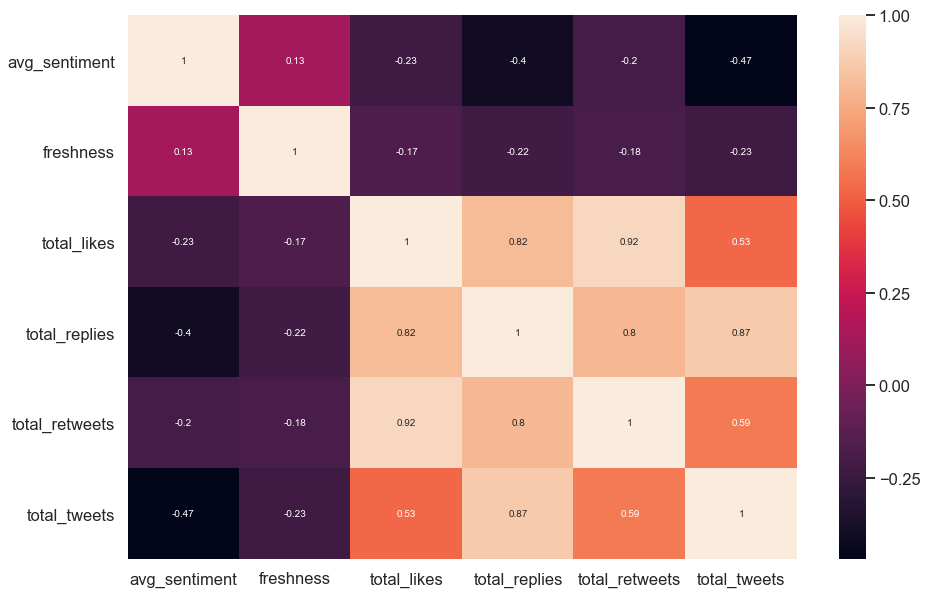

In [54]:
plt.figure(figsize=(15, 10))
sns.heatmap(merged_df.corr(), annot=True)

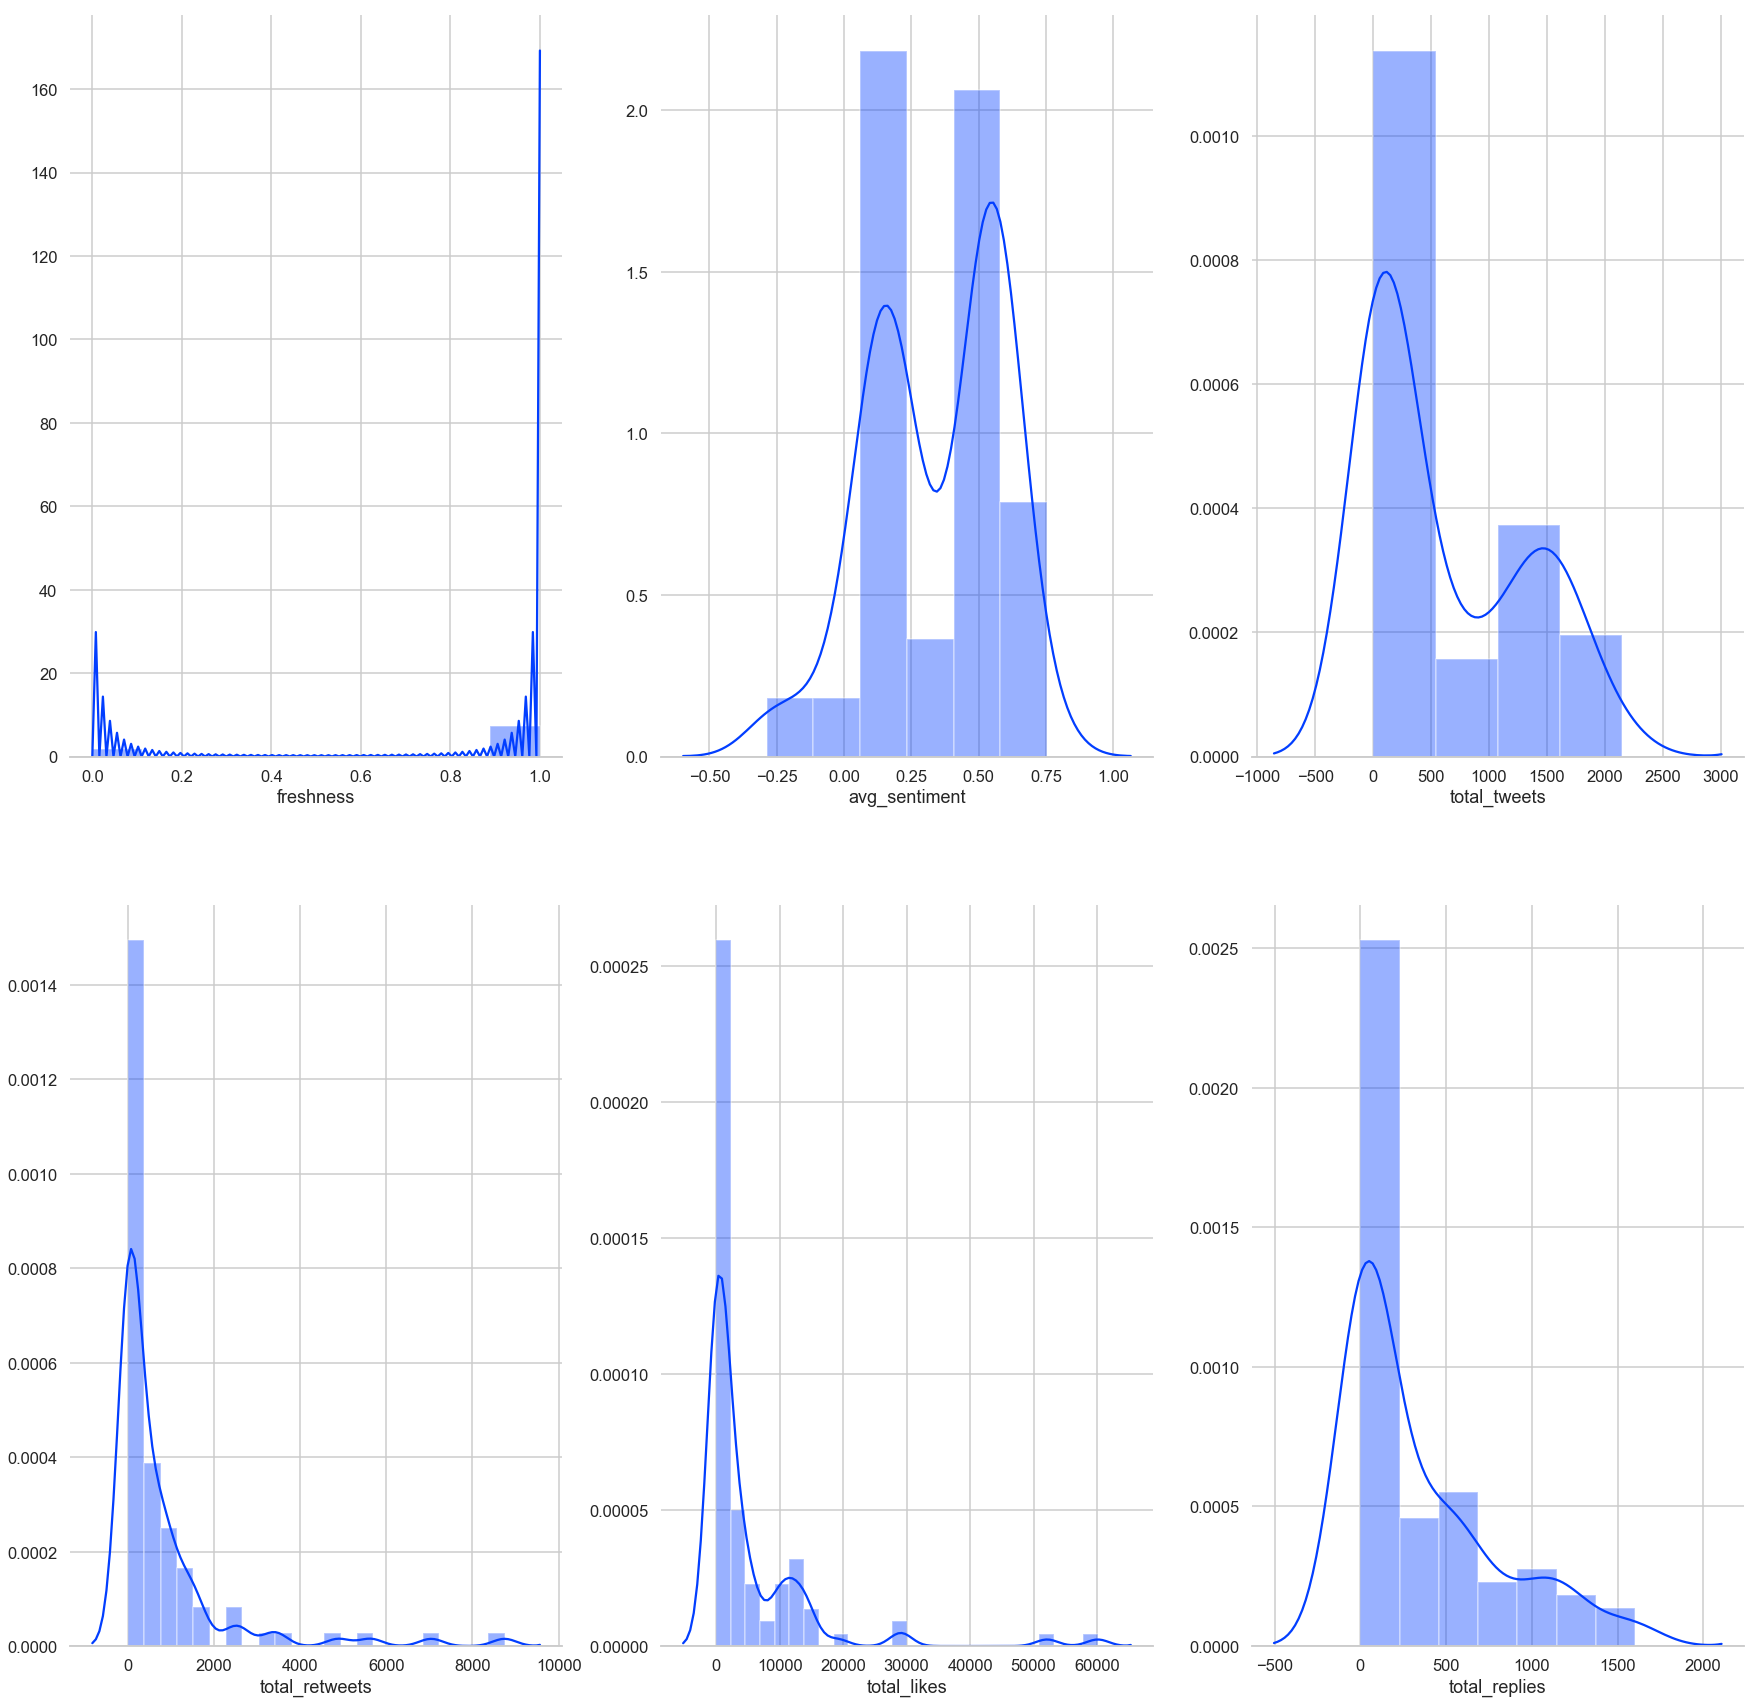

In [55]:
# Plot the distributions of the target and variables

fig, axes = plt.subplots(2, 3, figsize=(30,30))
sns.despine(left=True)
sns.distplot(merged_df['freshness'], ax=axes[0,0])
sns.distplot(merged_df['avg_sentiment'], ax=axes[0,1])
sns.distplot(merged_df['total_tweets'], ax=axes[0,2])
sns.distplot(merged_df['total_retweets'], ax=axes[1,0])
sns.distplot(merged_df['total_likes'], ax=axes[1,1])
sns.distplot(merged_df['total_replies'], ax=axes[1,2])

# Saving the plots of the distributions

# fig.savefig('Distributions.png', bbox_inches='tight')

# Modeling

#### Applied StandardScaler

In [56]:
X = merged_df.drop(['freshness', 'movie'], axis=1)
y = merged_df['freshness']

In [57]:
merged_df = merged_df.drop('movie', axis=1)
scaler = StandardScaler()
merged_df = scaler.fit_transform(merged_df)

In [58]:
X.columns

Index(['avg_sentiment', 'total_likes', 'total_replies', 'total_retweets',
       'total_tweets'],
      dtype='object')

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 22)

#### Helper functions

In [60]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
def plot_feature_importances(model, X_train):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), ['avg_sentiment', 'total_likes', 'total_replies', 'total_retweets', 'total_tweets']) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-score: {}".format(best_score))

### SMOTE to account for class imbalance

In [61]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

### Dummy Classifier

In [62]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train,y_train)
dummy_pred = dummy.predict(X_test)

In [63]:
print_metrics(y_test, dummy_pred)

Precision Score: 0.0
Recall Score: 0.0
Accuracy Score: 0.21052631578947367
F1 Score: 0.0


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
# Confusion matrix

pd.crosstab(y_test, dummy_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,4,4
1,15,15
All,19,19


### Decision Tree

In [65]:
tree = DecisionTreeClassifier(random_state=22)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=22, splitter='best')

In [66]:
y_pred = tree.predict(X_test)

In [67]:
tree.score(X_train, y_train)

1.0

In [68]:
print_metrics(y_test, y_pred)

Precision Score: 0.8333333333333334
Recall Score: 0.6666666666666666
Accuracy Score: 0.631578947368421
F1 Score: 0.7407407407407408


In [69]:
roc_auc_score(y_test, y_pred)

0.5833333333333333

In [70]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2,2,4
1,5,10,15
All,7,12,19


### Random Forest

In [71]:
forest = RandomForestClassifier(n_estimators=3, random_state=22)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

In [72]:
forest.score(X_train, y_train)

0.9590163934426229

In [73]:
print_metrics(y_test, y_pred)

Precision Score: 0.8333333333333334
Recall Score: 0.6666666666666666
Accuracy Score: 0.631578947368421
F1 Score: 0.7407407407407408


In [74]:
roc_auc_score(y_test, y_pred)

0.5833333333333333

In [75]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2,2,4
1,5,10,15
All,7,12,19


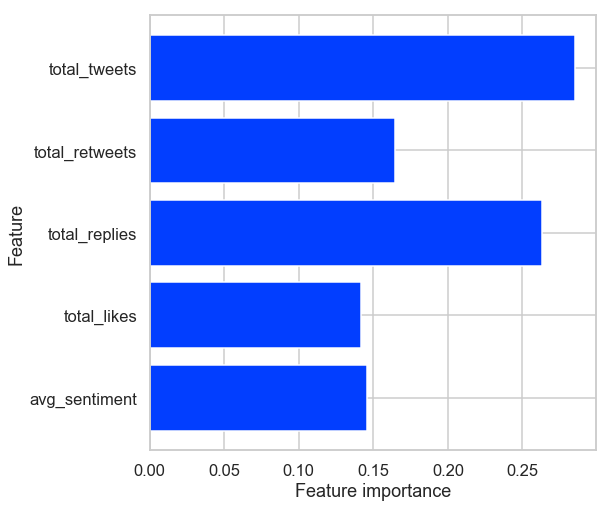

In [76]:
plot_feature_importances(forest, X_train)

### KNN

In [77]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [78]:
# find_best_k(X_train, y_train, X_test, y_test)

In [79]:
knn.score(X_train, y_train)

0.6721311475409836

In [80]:
print_metrics(y_test, y_pred)

Precision Score: 0.8333333333333334
Recall Score: 0.6666666666666666
Accuracy Score: 0.631578947368421
F1 Score: 0.7407407407407408


In [81]:
roc_auc_score(y_test, y_pred)

0.5833333333333333

In [82]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2,2,4
1,5,10,15
All,7,12,19


### Logistic Regression

In [83]:
logreg = LogisticRegression(random_state=22)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
logreg.score(X_train, y_train)

0.680327868852459

In [85]:
print_metrics(y_test, y_pred)

Precision Score: 0.7272727272727273
Recall Score: 0.5333333333333333
Accuracy Score: 0.47368421052631576
F1 Score: 0.6153846153846153


In [86]:
roc_auc_score(y_test, y_pred)

0.39166666666666666

In [87]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1,3,4
1,7,8,15
All,8,11,19


### XGBoost

In [88]:
boost = xgb.XGBClassifier(max_depth=1, learning_rate=0.5, min_child_weight=6, subsample=0.9)
boost.fit(X_train, y_train)
y_pred = boost.predict(np.array(X_test))

In [89]:
boost.score(X_train, y_train)

0.8770491803278688

In [90]:
print_metrics(y_test, y_pred)

Precision Score: 0.7333333333333333
Recall Score: 0.7333333333333333
Accuracy Score: 0.5789473684210527
F1 Score: 0.7333333333333333


In [91]:
roc_auc_score(y_test, y_pred)

0.36666666666666664

In [92]:
# Confusion matrix

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,0,4,4
1,4,11,15
All,4,15,19


In [93]:
# Without tuning

# Training Accuracy: 99.18%
# Validation accuracy: 63.16%

#### GridSearchCV Tuning

In [94]:
# param_grid = {
#     'max_depth': [1],
#     'learning_rate': [0.5],
#     'min_child_weight': [6],
#     'subsample': [0.9]
# }

In [95]:
# grid_clf = GridSearchCV(boost, param_grid, scoring='accuracy', cv=None, n_jobs=1)
# grid_clf.fit(X_train, y_train)

# best_parameters = grid_clf.best_params_

# print("GridSearchCV found the following optimal parameters: ")
# for param_name in sorted(best_parameters.keys()):
#     print("%s: %r" % (param_name, best_parameters[param_name]))

# training_preds = grid_clf.predict(X_train)
# val_preds = grid_clf.predict(np.array(X_test))
# training_accuracy = accuracy_score(y_train, training_preds)
# val_accuracy = accuracy_score(y_test, val_preds)

# print("")
# print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
# print("Validation accuracy: {:.4}%".format(val_accuracy * 100))